In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import h2o
import time
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

%matplotlib inline
import os
print(os.listdir("../input"))

['heart-disease-uci']


In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp79t7efka
  JVM stdout: /tmp/tmp79t7efka/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp79t7efka/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_y90aur
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [5]:
heart_df = h2o.import_file("/kaggle/input/heart-disease-uci/heart.csv", destination_frame="heart_df")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
heart_df.head()

﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
heart_df.describe()

Rows:303
Cols:14




,﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
type,int,int,int,int,int,int,int,int,int,real,int,int,int,int
mins,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,54.36633663366333,0.6831683168316832,0.9669966996699675,131.62376237623772,246.26402640264035,0.1485148514851485,0.5280528052805283,149.6468646864687,0.32673267326732675,1.0396039603960392,1.3993399339933994,0.7293729372937293,2.313531353135314,0.5445544554455446
maxs,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0
sigma,9.08210098983786,0.46601082333962385,1.0320524894832983,17.538142813517098,51.83075098793005,0.35619787492797644,0.525859596359298,22.905161114914087,0.4697944645223165,1.1610750220686346,0.6162261453459621,1.0226063649693276,0.6122765072781408,0.49883478416439136
zeros,0,96,143,0,0,258,147,0,204,99,21,175,2,138
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0


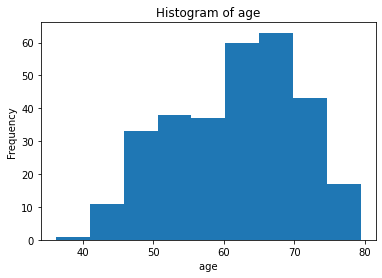

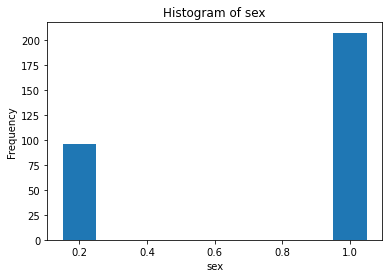

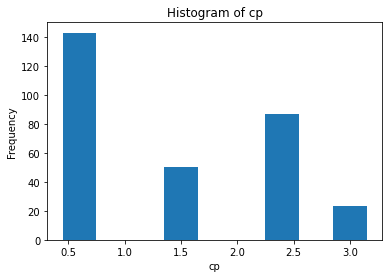

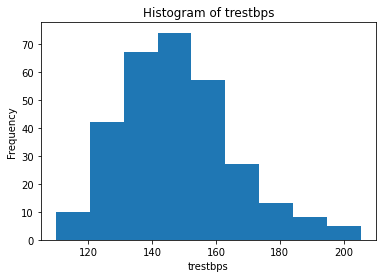

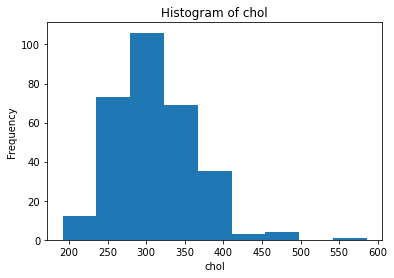

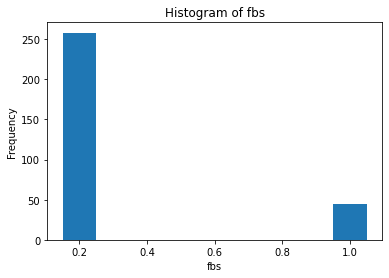

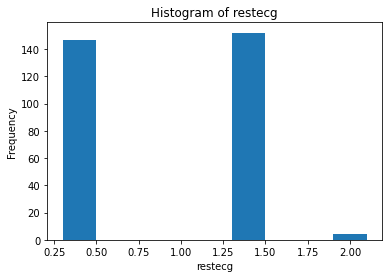

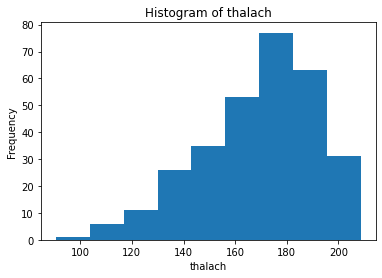

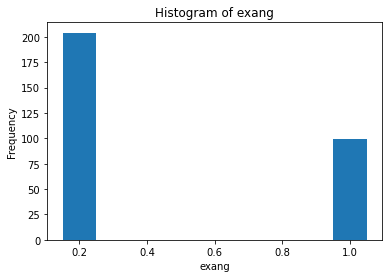

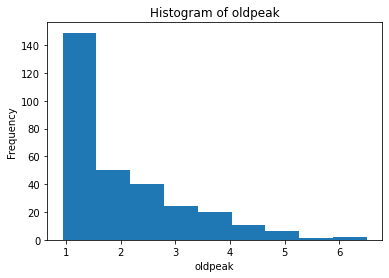

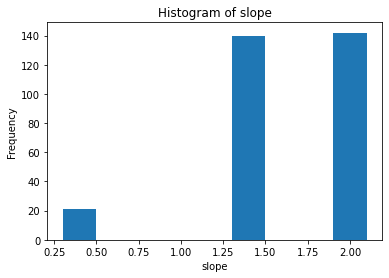

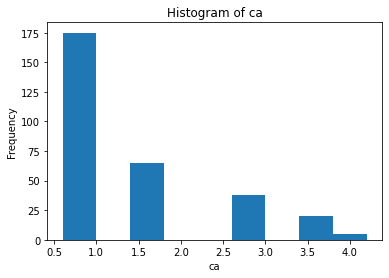

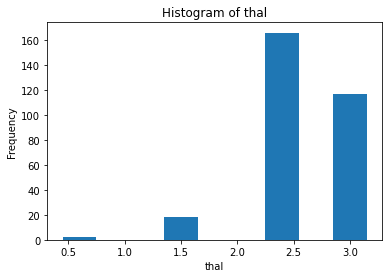

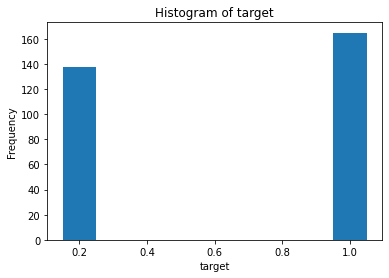

In [8]:
for col in heart_df.columns:
    heart_df[col].hist()

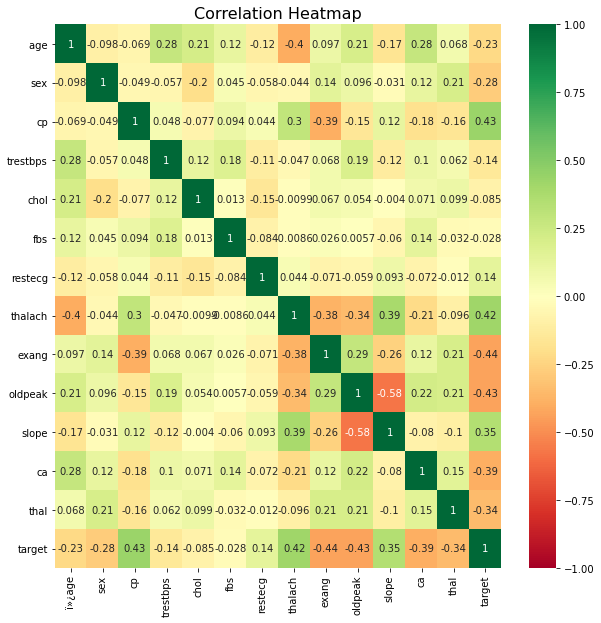

In [9]:
plt.figure(figsize=(10,10))
corr = heart_df.cor().as_data_frame()
corr.index = heart_df.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [10]:
train, valid, test = heart_df.split_frame(ratios=[0.6,0.1], seed=1234)
response = "target"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Number of rows in train, valid and test set :  185 32 86


In [11]:
predictors = heart_df.columns[:-1]
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [12]:
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1594960769537_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,11015.0,4.0,5.0,4.98,7.0,16.0,12.88




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.015019592604081191
RMSE: 0.12255444750836744
LogLoss: 0.0939217678549615
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6206872083065069: 


,,0,1,Error,Rate
0,0,80.0,0.0,0.0,(0.0/80.0)
1,1,0.0,105.0,0.0,(0.0/105.0)
2,Total,80.0,105.0,0.0,(0.0/185.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.620687,1.000000,102.0
1,max f2,0.620687,1.000000,102.0
2,max f0point5,0.620687,1.000000,102.0
3,max accuracy,0.620687,1.000000,102.0
4,max precision,0.994329,1.000000,0.0
5,max recall,0.620687,1.000000,102.0
6,max specificity,0.994329,1.000000,0.0
7,max absolute_mcc,0.620687,1.000000,102.0
8,max min_per_class_accuracy,0.620687,1.000000,102.0
9,max mean_per_class_accuracy,0.620687,1.000000,102.0



Gains/Lift Table: Avg response rate: 56.76 %, avg score: 56.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.016216,0.993925,1.761905,1.761905,1.000000,0.994060,1.000000,0.994060,0.028571,0.028571,76.190476,76.190476,0.028571
1,2,0.021622,0.992088,1.761905,1.761905,1.000000,0.993522,1.000000,0.993925,0.009524,0.038095,76.190476,76.190476,0.038095
2,3,0.032432,0.991085,1.761905,1.761905,1.000000,0.991379,1.000000,0.993076,0.019048,0.057143,76.190476,76.190476,0.057143
3,4,0.043243,0.990670,1.761905,1.761905,1.000000,0.990843,1.000000,0.992518,0.019048,0.076190,76.190476,76.190476,0.076190
4,5,0.054054,0.989709,1.761905,1.761905,1.000000,0.990102,1.000000,0.992035,0.019048,0.095238,76.190476,76.190476,0.095238
5,6,0.102703,0.984029,1.761905,1.761905,1.000000,0.986999,1.000000,0.989650,0.085714,0.180952,76.190476,76.190476,0.180952
6,7,0.151351,0.978579,1.761905,1.761905,1.000000,0.981434,1.000000,0.987009,0.085714,0.266667,76.190476,76.190476,0.266667
7,8,0.200000,0.968227,1.761905,1.761905,1.000000,0.974073,1.000000,0.983862,0.085714,0.352381,76.190476,76.190476,0.352381
8,9,0.302703,0.948130,1.761905,1.761905,1.000000,0.957932,1.000000,0.975065,0.180952,0.533333,76.190476,76.190476,0.533333
9,10,0.400000,0.915154,1.761905,1.761905,1.000000,0.934848,1.000000,0.965282,0.171429,0.704762,76.190476,76.190476,0.704762




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-07-17 04:40:43,0.030 sec,0.0,0.495414,0.683988,0.500000,0.567568,1.000000,0.432432
1,,2020-07-17 04:40:44,0.256 sec,1.0,0.467104,0.628455,0.932440,0.950659,1.761905,0.145946
2,,2020-07-17 04:40:44,0.315 sec,2.0,0.442075,0.581606,0.944881,0.958745,1.761905,0.135135
3,,2020-07-17 04:40:44,0.339 sec,3.0,0.419179,0.540070,0.953095,0.966266,1.761905,0.118919
4,,2020-07-17 04:40:44,0.363 sec,4.0,0.400119,0.506450,0.964167,0.974883,1.761905,0.102703
5,,2020-07-17 04:40:44,0.388 sec,5.0,0.383262,0.477012,0.966190,0.975538,1.761905,0.091892
6,,2020-07-17 04:40:44,0.413 sec,6.0,0.368044,0.450428,0.965119,0.974862,1.761905,0.091892
7,,2020-07-17 04:40:44,0.437 sec,7.0,0.354256,0.426543,0.969583,0.978768,1.761905,0.091892
8,,2020-07-17 04:40:44,0.458 sec,8.0,0.338820,0.400697,0.974524,0.982514,1.761905,0.064865
9,,2020-07-17 04:40:44,0.477 sec,9.0,0.328613,0.382483,0.974286,0.982181,1.761905,0.070270



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,cp,49.772530,1.000000,0.234219
1,ca,35.674095,0.716743,0.167875
2,﻿age,24.601374,0.494276,0.115769
3,thal,24.594597,0.494140,0.115737
4,oldpeak,20.618956,0.414264,0.097029
5,chol,14.614030,0.293616,0.068771
6,trestbps,13.263145,0.266475,0.062414
7,thalach,12.505259,0.251248,0.058847
8,sex,7.936414,0.159454,0.037347
9,restecg,4.235344,0.085094,0.019931


In [13]:
perf = gbm.model_performance(valid)
print(perf)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1336486752877018
RMSE: 0.36557991641732973
LogLoss: 0.4664779135599224
Mean Per-Class Error: 0.15625
AUC: 0.875
AUCPR: 0.9000100305272029
Gini: 0.75

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2657951768076915: 


,,0,1,Error,Rate
0,0,12.0,4.0,0.25,(4.0/16.0)
1,1,1.0,15.0,0.0625,(1.0/16.0)
2,Total,13.0,19.0,0.1562,(5.0/32.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.265795,0.857143,18.0
1,max f2,0.265795,0.903614,18.0
2,max f0point5,0.673415,0.855263,14.0
3,max accuracy,0.673415,0.843750,14.0
4,max precision,0.991354,1.000000,0.0
5,max recall,0.009800,1.000000,31.0
6,max specificity,0.991354,1.000000,0.0
7,max absolute_mcc,0.265795,0.699913,18.0
8,max min_per_class_accuracy,0.673415,0.812500,14.0
9,max mean_per_class_accuracy,0.673415,0.843750,14.0



Gains/Lift Table: Avg response rate: 50.00 %, avg score: 49.52 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.03125,0.991243,2.000000,2.000000,1.000000,0.991354,1.000000,0.991354,0.0625,0.0625,100.000000,100.000000,0.0625
1,2,0.03125,0.991132,0.000000,2.000000,0.000000,0.000000,1.000000,0.991354,0.0000,0.0625,-100.000000,100.000000,0.0625
2,3,0.03125,0.991020,0.000000,2.000000,0.000000,0.000000,1.000000,0.991354,0.0000,0.0625,-100.000000,100.000000,0.0625
3,4,0.06250,0.990985,2.000000,2.000000,1.000000,0.990995,1.000000,0.991175,0.0625,0.1250,100.000000,100.000000,0.1250
4,5,0.06250,0.990973,0.000000,2.000000,0.000000,0.000000,1.000000,0.991175,0.0000,0.1250,-100.000000,100.000000,0.1250
5,6,0.12500,0.989693,2.000000,2.000000,1.000000,0.990447,1.000000,0.990811,0.1250,0.2500,100.000000,100.000000,0.2500
6,7,0.15625,0.985975,2.000000,2.000000,1.000000,0.987473,1.000000,0.990143,0.0625,0.3125,100.000000,100.000000,0.3125
7,8,0.21875,0.952061,2.000000,2.000000,1.000000,0.972894,1.000000,0.985215,0.1250,0.4375,100.000000,100.000000,0.4375
8,9,0.31250,0.868964,1.333333,1.800000,0.666667,0.903407,0.900000,0.960672,0.1250,0.5625,33.333333,80.000000,0.5000
9,10,0.40625,0.711283,1.333333,1.692308,0.666667,0.774019,0.846154,0.917599,0.1250,0.6875,33.333333,69.230769,0.5625


In [14]:
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 1000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
)      
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [15]:
gbm_tune.model_performance(valid).auc()

0.9140625

In [16]:
from h2o.grid.grid_search import H2OGridSearch

gbm_grid = H2OGradientBoostingEstimator(
    ntrees = 1000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
) 

hyper_params = {'max_depth':[4,6,8,10,12]}
grid = H2OGridSearch(gbm_grid, hyper_params,
                         grid_id='depth_grid',
                         search_criteria={'strategy': "Cartesian"})
#Train grid search
grid.train(x=predictors, 
           y=response,
           training_frame=train,
           validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [17]:
print(grid)

    max_depth           model_ids             logloss
0           6  depth_grid_model_2  0.5373946106921493
1           8  depth_grid_model_3  0.5373946106921493
2          10  depth_grid_model_4  0.5373946106921493
3          12  depth_grid_model_5  0.5373946106921493
4           4  depth_grid_model_1  0.5378250211341893



In [18]:
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

    max_depth           model_ids         auc
0           4  depth_grid_model_1  0.91796875
1           6  depth_grid_model_2   0.9140625
2           8  depth_grid_model_3   0.9140625
3          10  depth_grid_model_4   0.9140625
4          12  depth_grid_model_5   0.9140625



In [19]:
cv_gbm = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_gbm.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
cv_summary

gbm Model Build progress: |███████████████████████████████████████████████| 100%


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
0,accuracy,0.838469,0.030361386,0.87234044,0.8235294,0.85365856,0.8043478
1,auc,0.8643752,0.039686702,0.9097744,0.863354,0.8132184,0.87115383
2,aucpr,0.89292765,0.038321696,0.9360916,0.8990721,0.8936617,0.8428853
3,err,0.16153096,0.030361386,0.12765957,0.1764706,0.14634146,0.19565217
4,err_count,7.5,1.7320508,6.0,9.0,6.0,9.0
5,f0point5,0.84057343,0.06635267,0.8783784,0.859375,0.88235295,0.7421875
6,f1,0.85881275,0.04644086,0.8965517,0.8301887,0.9,0.80851066
7,f2,0.88115764,0.0539427,0.91549295,0.8029197,0.9183673,0.88785046
8,lift_top_group,1.8034483,0.3716236,1.6785715,1.8214285,1.4137931,2.3
9,logloss,0.4960855,0.12090425,0.38669455,0.667273,0.48352513,0.44684923


In [20]:
cv_gbm.model_performance(valid).auc()

0.87109375

In [21]:
from h2o.estimators import H2OXGBoostEstimator

cv_xgb = H2OXGBoostEstimator(
    ntrees = 1000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_xgb.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_xgb.model_performance(valid).auc()

xgboost Model Build progress: |███████████████████████████████████████████| 100%


0.88671875

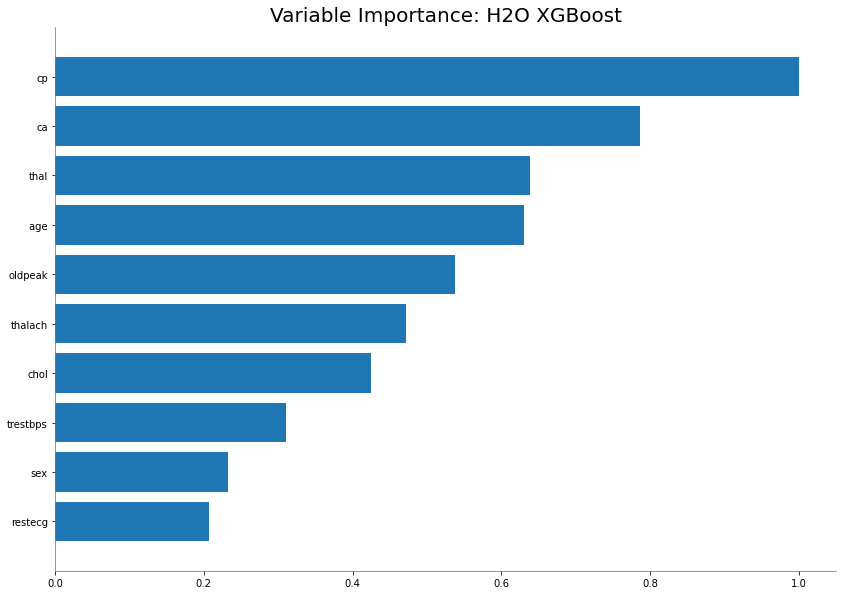

In [22]:
cv_xgb.varimp_plot()

In [ ]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |
04:42:25.787: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

█

In [ ]:
lb = aml.leaderboard
lb